## Wiener-Askey Scheme

Source: https://doi.org/10.1137/S1064827501387826

Polynomial chaos expansion often assume that the polynomial expansion used is of the Wiener-Askey scheme veriaty.
The reason for this is that the expansion in the scheme correspond to orthogonality with respect to some standard probability distribution.

There usually exists a few variations of the Wiener-Askey scheme.
This is because of two reasons:

1. The weight function in the classical scheme do not normalize to 1 which probability density functions are required to do.
2. Any polynomial can be multiplied with a scalar and retain its orthogonal properties.

The former meas there is only one unique variation that is applicable in the context of uncertainty quantification.
The latter is made unique by assuming that the leading coefficient to the largest exponent should be 1.
But for convinience, the more canonical versions of the schemes will be listed as well here.

In ``chaospy``, though descrete distributions are supported, we will only focus on the continous cases.

### Hermite polynomials

The Hermite polynomials are associated with the Standard Gaussian distribution:

In [1]:
import chaospy

distribution = chaospy.Normal(0, 1)
chaospy.generate_expansion(3, distribution)

polynomial([1.0, q0, q0**2-1.0, q0**3-3.0*q0])

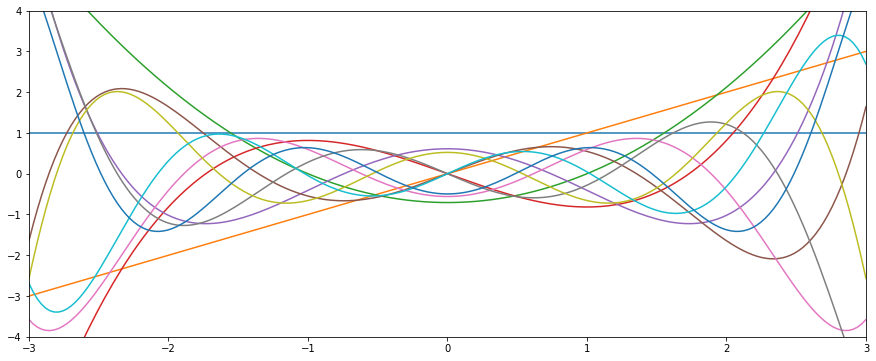

In [2]:
import numpy
from matplotlib import pyplot

coords = numpy.linspace(-3, 3, 200)
expansion = chaospy.generate_expansion(10, distribution, normed=True)

pyplot.rc("figure", figsize=[15, 6])
pyplot.plot(coords, expansion(coords).T)
pyplot.axis([-3, 3, -4, 4])
pyplot.show()

A multivariate expansion:

In [3]:
distribution = chaospy.J(
    chaospy.Normal(0, 1), chaospy.Normal(0, 1))
chaospy.generate_expansion(3, distribution)[:6]

polynomial([1.0, q1, q0, q1**2-1.0, q0*q1, q0**2-1.0])

The Hermite polynomials have classically a weight function $W(x) = e^{-x^2}$, and an expansion:

In [4]:
distribution = chaospy.Normal(0, 1)
chaospy.generate_expansion(3, distribution)*2**numpy.arange(4)

polynomial([1.0, 2.0*q0, 4.0*q0**2-4.0, 8.0*q0**3-24.0*q0])

### Legendre Polynomials

The Legendre are associated with the Uniform distribution on the $[-1, 1]$ interval.

In [5]:
distribution = chaospy.Uniform(-1, 1)
chaospy.generate_expansion(3, distribution).round(4)

polynomial([1.0, q0, q0**2-0.3333, q0**3-0.6*q0])

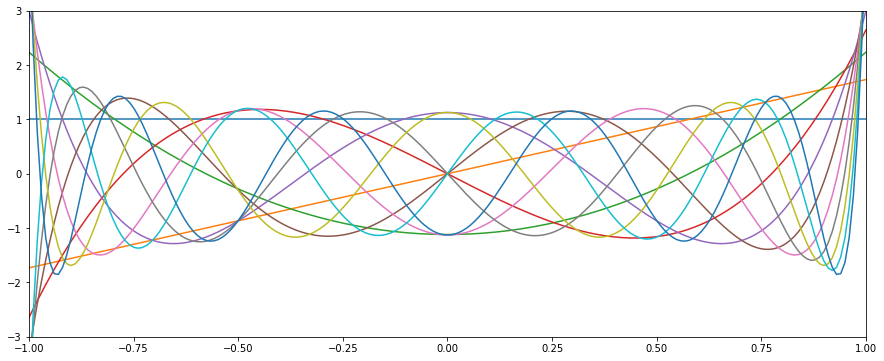

In [6]:
coords = numpy.linspace(-1, 1, 200)
expansion = chaospy.generate_expansion(10, distribution, normed=True)

pyplot.plot(coords, expansion(coords).T)
pyplot.axis([-1, 1, -3, 3])
pyplot.show()

A multivariate expansion:

In [7]:
distribution = chaospy.J(
    chaospy.Uniform(-1, 1), chaospy.Uniform(-1, 1))
chaospy.generate_expansion(3, distribution)[:6].round(4)

polynomial([1.0, q1, q0, q1**2-0.3333, q0*q1, q0**2-0.3333])

The Legendre polynomials have classically a weight function $W(x) = 1$ on the interval $[-1, 1]$, and an expansion:

In [8]:
distribution = chaospy.Uniform(-1, 1)
poly = chaospy.generate_expansion(3, distribution)
(poly/poly(1)).round(4)

polynomial([1.0, q0, 1.5*q0**2-0.5, 2.5*q0**3-1.5*q0])

### Laguerre polynomials

Laguerre polynomials with the Exponential distribution.

In [9]:
distribution = chaospy.Exponential()
chaospy.generate_expansion(2, distribution)

polynomial([1.0, q0-1.0, q0**2-4.0*q0+2.0])

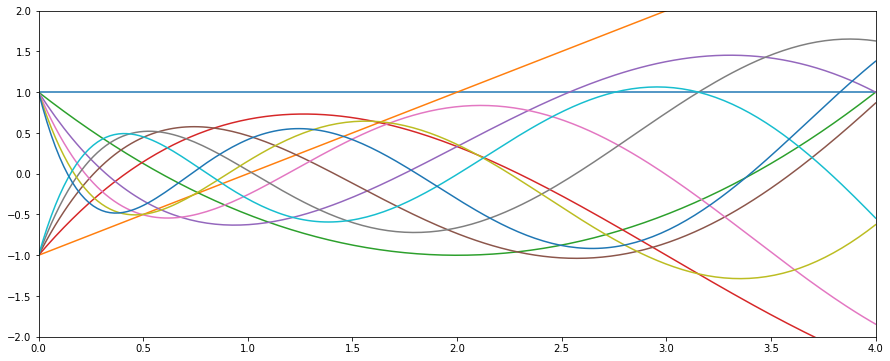

In [10]:
coords = numpy.linspace(0, 4, 200)
expansion = chaospy.generate_expansion(10, distribution, normed=True)

pyplot.plot(coords, expansion(coords).T)
pyplot.axis([0, 4, -2, 2])
pyplot.show()

A multivariate expansion:

In [11]:
distribution = chaospy.J(
    chaospy.Exponential(), chaospy.Exponential())
chaospy.generate_expansion(2, distribution)[:5]

polynomial([1.0, q1-1.0, q0-1.0, q1**2-4.0*q1+2.0, q0*q1-q1-q0+1.0])

The Laguerre polynomials have classically a weight function $W(x) = e^{-x}$, and an expansion:

In [12]:
distribution = chaospy.Exponential()
poly = chaospy.generate_expansion(3, distribution)
(poly/poly(0)).round(4)[:5]

polynomial([1.0, -q0+1.0, 0.5*q0**2-2.0*q0+1.0,
            -0.1667*q0**3+1.5*q0**2-3.0*q0+1.0])

### Generalized Laguerre polynomials

Generalized Laguerre polynomials with the Gamma distribution with parameter $\alpha$.

In [13]:
alpha = 2
distribution = chaospy.Gamma(alpha+1)
chaospy.generate_expansion(3, distribution)[:3]

polynomial([1.0, q0-3.0, q0**2-8.0*q0+12.0])

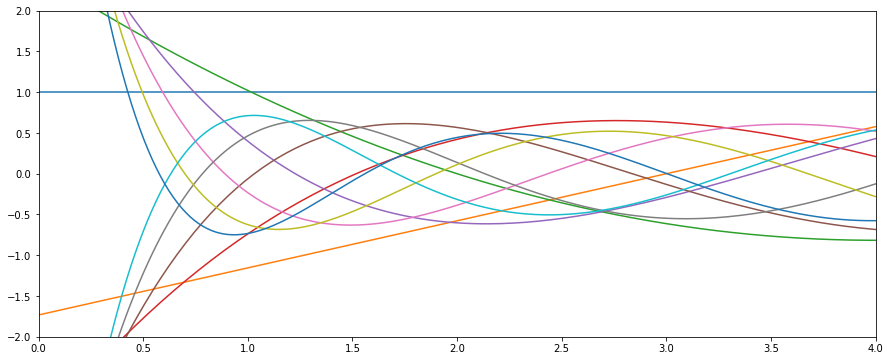

In [14]:
coords = numpy.linspace(0, 4, 200)
expansion = chaospy.generate_expansion(10, distribution, normed=True)

pyplot.plot(coords, expansion(coords).T)
pyplot.axis([0, 4, -2, 2])
pyplot.show()

A multivariate expansion:

In [15]:
distribution = chaospy.J(
    chaospy.Gamma(alpha+1), chaospy.Gamma(alpha+1))
chaospy.generate_expansion(3, distribution)[:6]

polynomial([1.0, q1-3.0, q0-3.0, q1**2-8.0*q1+12.0,
            q0*q1-3.0*q1-3.0*q0+9.0, q0**2-8.0*q0+12.0])

The Generalized Laguerre polynomials have classically a weight function $W(x) = x^\alpha e^{-\alpha x}$, and an expansion:

In [16]:
poly1 = chaospy.generate_expansion(3, chaospy.Gamma(alpha+1))
poly2 = chaospy.generate_expansion(3, chaospy.Exponential())
(poly1/poly2(0)).round(4)

polynomial([1.0, -q0+3.0, 0.5*q0**2-4.0*q0+6.0,
            -0.1667*q0**3+2.5*q0**2-10.0*q0+10.0])

### Jacobi polynomials

Jacobi polynomials with the Beta distribution with parameters $\alpha$ and $\beta$.

In [17]:
alpha = 2
beta = 3
distribution = chaospy.Beta(alpha, beta)
chaospy.generate_expansion(3, distribution).round(4)

polynomial([1.0, q0-0.4, q0**2-0.8571*q0+0.1429,
            q0**3-1.3333*q0**2+0.5*q0-0.0476])

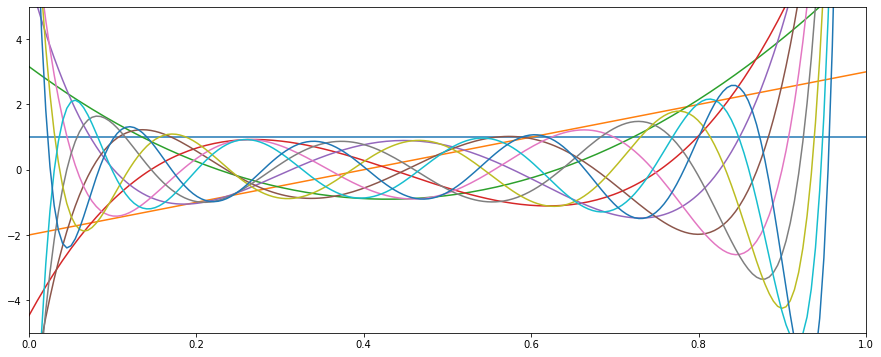

In [18]:
coords = numpy.linspace(0, 1, 200)
expansion = chaospy.generate_expansion(10, distribution, normed=True)

pyplot.plot(coords, expansion(coords).T)
pyplot.axis([0, 1, -5, 5])
pyplot.show()

A multivariate expansion:

In [19]:
distribution = chaospy.J(
    chaospy.Beta(alpha, beta), chaospy.Beta(alpha, beta))
chaospy.generate_expansion(3, distribution)[:6].round(4)

polynomial([1.0, q1-0.4, q0-0.4, q1**2-0.8571*q1+0.1429,
            q0*q1-0.4*q1-0.4*q0+0.16, q0**2-0.8571*q0+0.1429])

The Beta polynomials have classically a weight function: $W(x) = (1-x)^\alpha(1+x)^\beta$ over the interval $[-1, 1]$, and an expansion:

In [20]:
# NBVAL_CHECK_OUTPUT
from scipy.special import comb

distribution = chaospy.Beta(alpha, beta, lower=-1, upper=1)

func = lambda n: numpy.sum(
    comb(n+alpha, n-numpy.arange(n+1))*
    comb(n+beta, numpy.arange(n+1))
)/2**n
coefficients = numpy.array([func(n) for n in range(4)])

(chaospy.generate_expansion(3, distribution)*coefficients).round(4)

polynomial([1.0, 3.5*q0+0.7, 9.0*q0**2+2.5714*q0-1.2857,
            20.625*q0**3+6.875*q0**2-6.875*q0-0.9821])